In [15]:
from sklearn import model_selection
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.model_selection import cross_val_score

In [16]:
digits = load_digits()
print (digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [47]:
data = digits ["data"]
images = digits ["images"]
target = digits ["target"]
target_names = digits ["target_names"]

In [48]:
idx = (target == 3) | (target == 9)

In [49]:
data_cleaned = data[idx]
target_cleaned = target[idx]

In [50]:
# select only 2 features (further covered in ex. 2)
data_cleaned=data_cleaned[:,9:11]

In [51]:
X_all = data_cleaned
y_all = target_cleaned
X_train , X_test , y_train , y_test = model_selection.train_test_split( 
    X_all , y_all , test_size = 0.4 , random_state = 0
)


## Exercise 4 SVM

In [59]:
from sklearn.base import BaseEstimator, ClassifierMixin

# define class to later on use the sckit learn cross-validation
class SVMClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, lmbda=0.01, learning_rate=0.001, num_iters=1000):
        self.lmbda = lmbda
        self.learning_rate = learning_rate
        self.num_iters = num_iters

    def fit(self, X, y):
        self.mu, self.covmat, self.beta, self.b = fit_svm(X, y)
        return self

    def predict(self, X):
        return predict_svm(X, self.beta, self.b)

    
    def accuracy(self, X, y):
        return svm_accuracy(self.predict(X,y), y)
        


def fit_svm(training_features, training_labels):
    training_labels[training_labels == 3] = -1
    training_labels[training_labels == 9] = 1    
    num_iters=1000
    
    # Initialize the parameters
    num_samples, num_features = training_features.shape
    beta = np.random.normal(size=(num_features))
    b = 0
    
    learning_rate=0.001
    lmbda = 0.01
    N = num_samples

    # Gradient descent to optimize the parameters
    for i in range(num_iters):
        
        # Compute the hinge loss
        scores = training_labels * np.dot(training_features, beta) + b
        relu = np.maximum(0, 1 - scores)
        loss = 0.5 * np.dot(beta.T, beta) + (lmbda/N) * np.sum(relu)

        # Compute the gradients       
        sum_constraint = (scores < 1)
        d_beta = beta + (lmbda/N) * np.sum(-training_labels*training_features.T, where=sum_constraint)      
        d_b = (lmbda/N) * np.sum(-training_labels,where=sum_constraint)

        # Update the parameters
        beta = beta - learning_rate * d_beta
        b = b - learning_rate * d_b
    mu = np.mean(training_features, axis=0)
    covmat = np.cov(training_features.T)

    return mu, covmat, beta, b
    
    
def predict_svm(test_features, beta, b):
    scores = np.dot(test_features, beta) + b
    preds = np.where(scores >= 0, 1, -1)
    return preds    
    
def visualize_svm(mu, covmat, X_train, y_train, b, beta):
    colors = ['b', 'r']
    classes = ["Digit 3", "Digit 9"]

    # Plot the training data as scatter plots
    plt.scatter(X_train[(y_train==-1),0], X_train[(y_train==-1),1], c=colors[0], label=f'{classes[0]}')
    plt.scatter(X_train[(y_train==1),0], X_train[(y_train==1),1], c=colors[1], label=f'{classes[1]}')

    
    # don't know how to print the ellipses though....
    
    
def cross_validate(X_train, y_train):
    return cross_val_score(estimator=fit_svm, X=X_train, y=y_train, cv=10, scoring=svm_accuracy)

    
def svm_accuracy(prediction, truth):
    return np.mean(prediction == truth)
    

In [60]:
mu, covmat, beta, b = fit_svm(X_train,y_train)
predictions = predict_svm(X_test, beta, b)

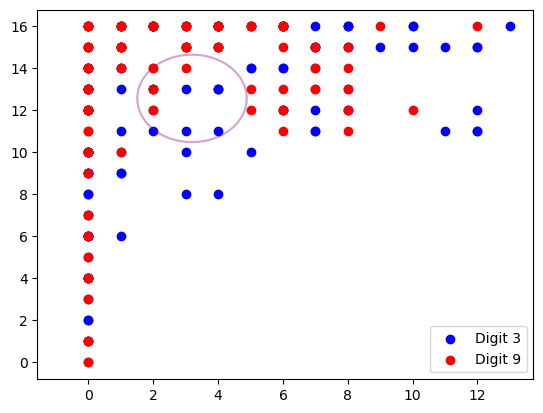

In [61]:
visualize_svm(mu, covmat, X_train, y_train, b, beta)

In [55]:
model = SVMClassifier()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")

In [26]:
print('Accuracy: {:.2f} (+/- {:.2f})'.format(scores.mean(), scores.std()))

Accuracy: 0.50 (+/- 0.18)


#### accuracy of scikit learn classifier

In [27]:
from sklearn import svm
clf = svm.SVC()
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print('Accuracy: {:.2f} (+/- {:.2f})'.format(scores.mean(), scores.std()))

Accuracy: 0.99 (+/- 0.02)
